<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Projects/blob/main/Fraud_Transaction_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

Payments related fraud is a key aspect of cyber-crime agencies and recent research has shown that machine learning techniques can be applied successfully to detect fraudulent transactions in large amounts of payments data. Such techniques have the ability to detect fraudulent transactions that human auditors may not be able to catch and also do this on a real time basis.

In this project, we apply multiple supervised machine learning techniques to the problem of fraud detection using a publicly available simulated payment transactions data. 

We aim to demonstrate how supervised ML techniques can be used to classify data with high class imbalance with high accuracy. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB


In [6]:
df.dropna(0,inplace = True)

<ipython-input-6-353697db5d3f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0,inplace = True)


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,69857.000000,6.985700e+04,6.985700e+04,6.985700e+04,6.985700e+04,6.985700e+04,69857.000000,69857.0
mean,7.893311,1.640200e+05,9.043196e+05,9.203112e+05,8.543644e+05,1.185141e+06,0.001532,0.0
std,1.874520,3.313748e+05,2.791634e+06,2.829900e+06,2.403015e+06,2.871791e+06,0.039107,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.011170e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,4.405764e+04,1.990900e+04,0.000000e+00,1.416700e+04,2.113068e+04,0.000000,0.0
75%,9.000000,1.991328e+05,1.721230e+05,1.940279e+05,5.186148e+05,9.824113e+05,0.000000,0.0
max,9.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [9]:
df['isFraud'].value_counts()

0.0    69750
1.0      107
Name: isFraud, dtype: int64

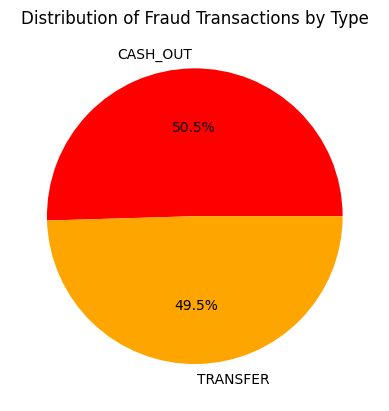

In [10]:
fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()
non_fraud_counts = df[df['isFraud'] == 0]['type'].value_counts()

plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['red', 'orange', 'blue', 'green', 'purple'])
plt.title('Distribution of Fraud Transactions by Type')
plt.show()

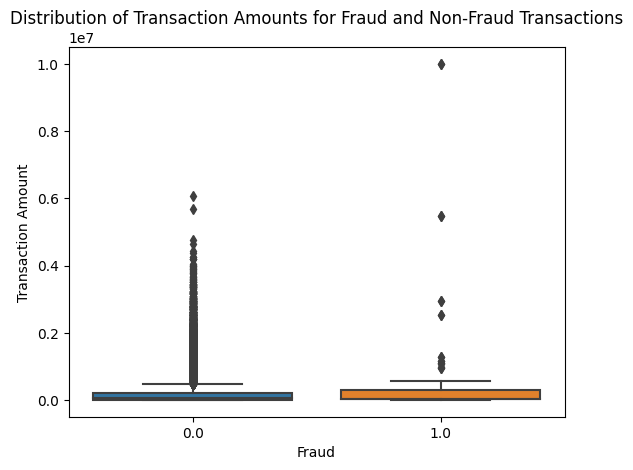

In [11]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
plt.scatter(df['amount'], df['oldbalanceOrg'] - df['newbalanceOrg'], c=df['isFraud'], cmap='coolwarm')
plt.title('Transaction Amount vs. Originator Balance Difference')
plt.xlabel('Transaction Amount')
plt.ylabel('Originator Balance Difference')
plt.colorbar(label='Fraud')
plt.show()

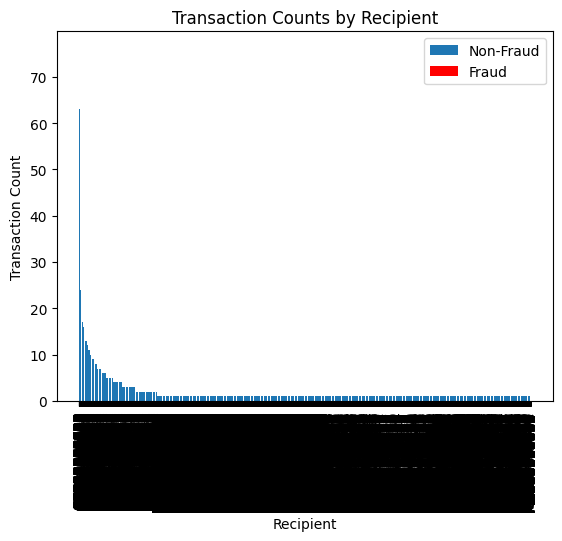

In [13]:
recipient_counts = df['nameDest'].value_counts()
fraud_recipient_counts = df[df['isFraud'] == 1]['nameDest'].value_counts()

plt.bar(recipient_counts.index, recipient_counts.values, label='Non-Fraud')
plt.bar(fraud_recipient_counts.index, fraud_recipient_counts.values, label='Fraud', color='red')
plt.title('Transaction Counts by Recipient')
plt.xlabel('Recipient')
plt.ylabel('Transaction Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [14]:
print(df['type'].value_counts())

PAYMENT     28732
CASH_OUT    20389
CASH_IN     13785
TRANSFER     6173
DEBIT         778
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

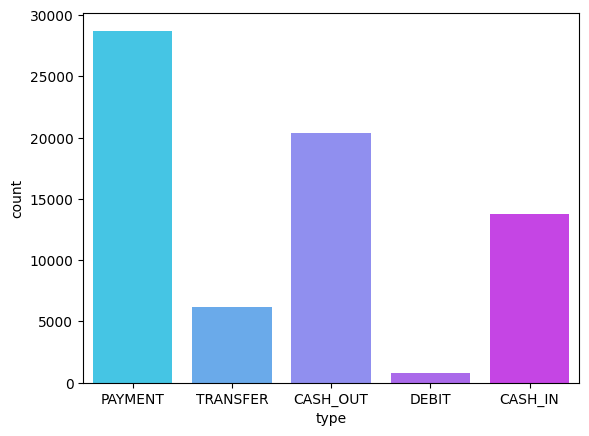

In [15]:
sns.countplot(data=df, x='type', palette='cool')

In [16]:
legit = len(df[df.isFraud == 0])

fraud = len(df[df.isFraud == 1])

legit_percent = (legit / (fraud + legit)) * 100

fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)

print("Number of Fraud transactions: ", fraud)

print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))

print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  69750
Number of Fraud transactions:  107
Percentage of Legit transactions: 99.8468 %
Percentage of Fraud transactions: 0.1532 %


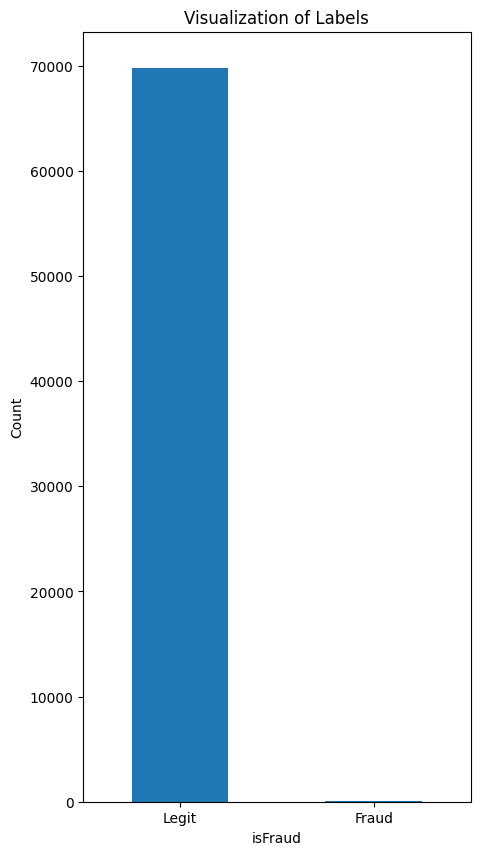

In [17]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

<ipython-input-18-b43972a5c17a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

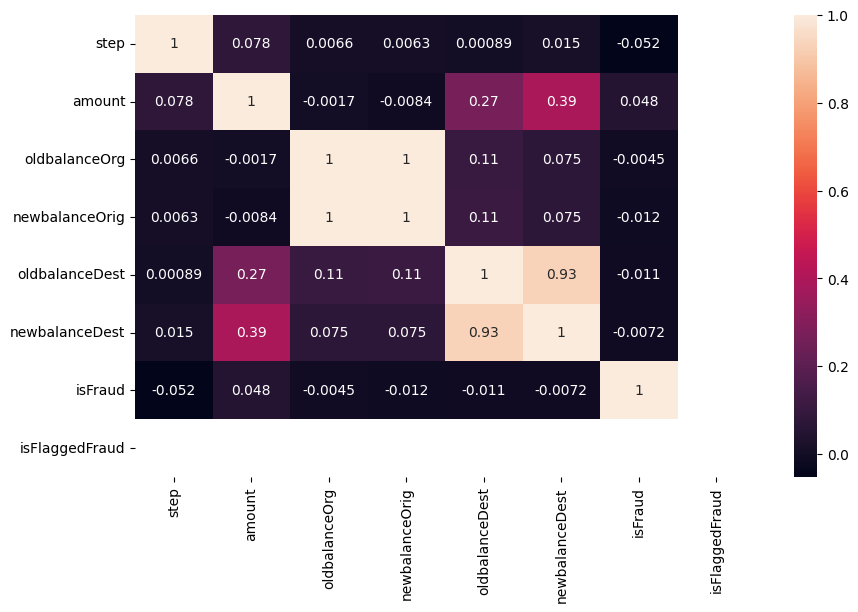

In [18]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [19]:
#Creating a copy of dataset

df1 = df.copy()

df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [20]:
import pandas as pd

for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'step': [1 2 3 4 5 6 7 8 9]
Unique values in column 'type': ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in column 'amount': [9839.64 1864.28  181.   ... 2866.47 2926.88 3704.3 ]
Unique values in column 'nameOrig': ['C1231006815' 'C1666544295' 'C1305486145' ... 'C258151288' 'C145336381'
 'C1539334900']
Unique values in column 'oldbalanceOrg': [1.70136000e+05 2.12490000e+04 1.81000000e+02 ... 1.21802423e+06
 1.12954949e+06 1.07812000e+05]
Unique values in column 'newbalanceOrig': [ 160296.36   19384.72       0.   ...  342150.54 1129549.49 1128519.13]
Unique values in column 'nameDest': ['M1979787155' 'M2044282225' 'C553264065' ... 'M1910014593' 'M1278169306'
 'M1849245575']
Unique values in column 'oldbalanceDest': [      0.     21182.     41898.   ... 1203910.56   50298.    103596.  ]
Unique values in column 'newbalanceDest': [     0.    40348.79 157982.12 ... 304887.13 307990.27 303651.85]
Unique values in column 'isFraud': [0. 1.]
Unique v

In [21]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

label_encoder = LabelEncoder()
df1['type_encoded'] = label_encoder.fit_transform(df1['type'])
df1['nameOrig_encoded'] = label_encoder.fit_transform(df1['nameOrig'])
df1['nameDest_encoded'] = label_encoder.fit_transform(df1['nameDest'])

In [22]:
print("Encoded values in column 'type_encoded':", df1['type_encoded'].unique())
print("Encoded values in column 'nameOrig_encoded':", df1['nameOrig_encoded'].unique())
print("Encoded values in column 'nameDest_encoded':", df1['nameDest_encoded'].unique())

Encoded values in column 'type_encoded': [3 4 1 2 0]
Encoded values in column 'nameOrig_encoded': [ 8190 23978 10826 ... 42876 16243 19351]
Encoded values in column 'nameDest_encoded': [23754 24694  7155 ... 22691 13295 21794]


In [23]:
one_hot_encoded = pd.get_dummies(df1['type'], prefix='type')

df1 = pd.concat([df1, one_hot_encoded], axis=1)

df1.drop('type', axis=1, inplace=True)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_df = df[numeric_cols]

    numeric_df = numeric_df.dropna()

    vif = pd.DataFrame()
    vif["variables"] = numeric_df.columns
    vif["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    return vif

vif_results = calc_vif(df1)
print(vif_results)

           variables         VIF
0               step    5.478526
1             amount    1.928360
2      oldbalanceOrg  615.245422
3     newbalanceOrig  622.080947
4     oldbalanceDest    9.339876
5     newbalanceDest   10.541315
6            isFraud    1.033502
7     isFlaggedFraud         NaN
8       type_encoded    6.013796
9   nameOrig_encoded    3.569509
10  nameDest_encoded    4.514813


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


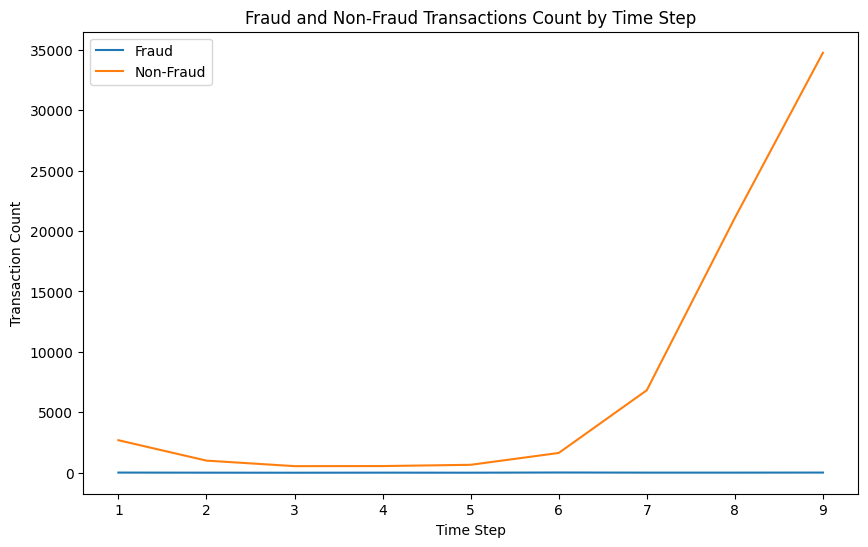

In [25]:
# Group the data by time step and fraud status
time_fraud_counts = df.groupby(['step', 'isFraud']).size().unstack()

# Plot the count of fraud and non-fraud transactions by time step
plt.figure(figsize=(10, 6))
plt.plot(time_fraud_counts.index, time_fraud_counts[1], label='Fraud')
plt.plot(time_fraud_counts.index, time_fraud_counts[0], label='Non-Fraud')
plt.xlabel('Time Step')
plt.ylabel('Transaction Count')
plt.title('Fraud and Non-Fraud Transactions Count by Time Step')
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df1 = df1.drop(['nameOrig', 'nameDest'], axis=1)

In [29]:
df1.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_encoded',
       'nameOrig_encoded', 'nameDest_encoded', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [30]:
X = df1.drop(["isFraud"], axis= 1)
Y = df1["isFraud"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (48899, 15)
Shape of X_test:  (20958, 15)


In [32]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(df1.loc[:,~df1.columns.isin(['isFraud'])]))
data_scaled.columns = df1.columns[:-1]
data_scaled['isFraud'] = df1['isFraud']

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn import metrics

In [34]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

# To Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

LR = LogisticRegression(solver='liblinear', max_iter=1000)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

#Cross-validation
cv_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=skf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'C': 100, 'penalty': 'l1'}
Best score:  0.9984334250259129
CV results: [0.9936996  0.99319556 0.9936996  0.99420217 0.99268969]
Mean CV accuracy: 0.9934973231783178


In [ ]:
LR = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear', random_state = 42)

LR.fit(x_train, y_train)

LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
y_pred_LR = LR.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test,y_pred_LR))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      4249
         1.0       0.18      0.92      0.29        25

    accuracy                           0.97      4274
   macro avg       0.59      0.95      0.64      4274
weighted avg       0.99      0.97      0.98      4274

[[4141  108]
 [   2   23]]


In [ ]:
print("TP,FP,TN,FN - Logistic Regression")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LR).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Logistic Regression
True Positives: 23
False Positives: 108
True Negatives: 4141
False Negatives: 2


In [ ]:
AUROC_LR = roc_auc_score(y_test, y_pred_LR)
print("AUROC: ", AUROC_LR)

AUROC:  0.9472911273240762


In [ ]:
#Best score:  0.9942356220804361
#TP : 35, FP: 802, TN: 24228, FN: 3
#AUROC score for LR is 0.94450

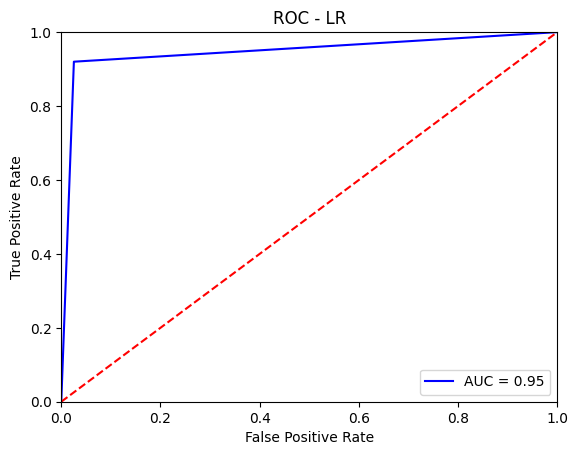

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_LR)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(KNN, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_estimator = grid_search.best_estimator_

# Cross-validation
cv_results = cross_val_score(best_estimator, x_train[:10000], y_train[:10000], cv=skf, scoring='roc_auc')
print("Stratified KFold Cross-Validation Results:")
print("Mean CV accuracy:", cv_results.mean())


Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}
Best score:  0.9223496311239225
Stratified KFold Cross-Validation Results:
Mean CV accuracy: 0.9223496311239225


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 9, weights = 'distance')

KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [ ]:
y_pred_KNN = KNN.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      4249
         1.0       0.16      0.88      0.27        25

    accuracy                           0.97      4274
   macro avg       0.58      0.93      0.63      4274
weighted avg       0.99      0.97      0.98      4274

[[4132  117]
 [   3   22]]


In [ ]:
AUROC_KNN = roc_auc_score(y_test, y_pred_KNN)
print("AUROC: ", AUROC_KNN)

AUROC:  0.9262320546010825


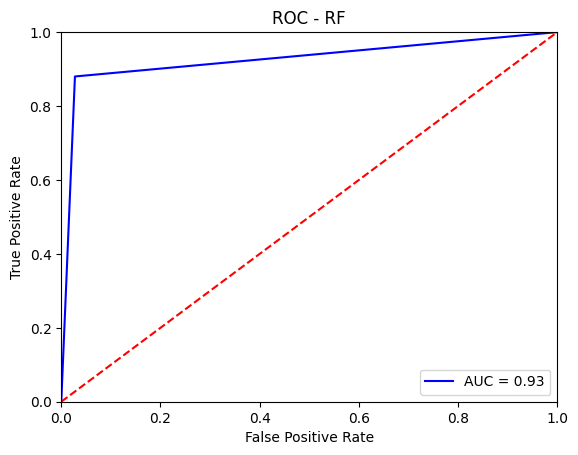

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_KNN)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train[:10000], y_train[:10000], cv=skf)
print("Stratified KFold Cross-Validation Results:")
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best score:  0.999194232795053
Stratified KFold Cross-Validation Results:
CV results: [0.998  0.996  0.9965 0.996  0.9985]
Mean CV accuracy: 0.9970000000000001


In [ ]:
RF = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_split = 5, n_estimators = 300)

RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300)

In [ ]:
y_pred_RF = RF.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4249
         1.0       0.76      0.64      0.70        25

    accuracy                           1.00      4274
   macro avg       0.88      0.82      0.85      4274
weighted avg       1.00      1.00      1.00      4274

[[4244    5]
 [   9   16]]


In [ ]:
print("TP,FP,TN,FN - Logistic Regression")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Logistic Regression
True Positives: 16
False Positives: 5
True Negatives: 4244
False Negatives: 9


In [ ]:
AUROC_RF = roc_auc_score(y_test, y_pred_RF)
print("AUROC: ", AUROC_RF)

AUROC:  0.8194116262650035


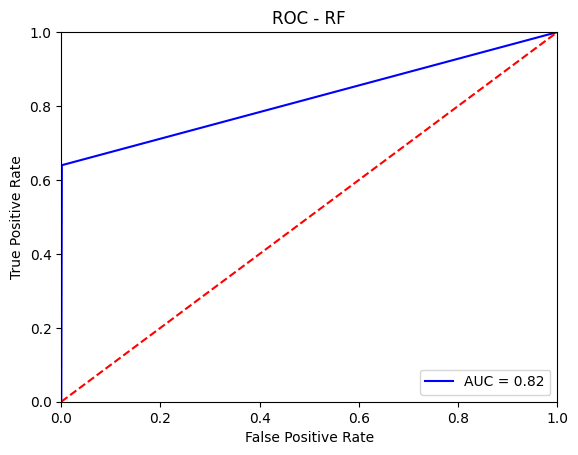

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_RF)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
from xgboost import XGBClassifier

XGB = XGBClassifier()

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train[:10000], y_train[:10000], cv=skf)
print("Stratified KFold Cross-Validation Results:")
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'gamma': 0, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}
Best score:  0.9773250891701613
Stratified KFold Cross-Validation Results:
CV results: [0.9985 0.998  0.9985 0.998  0.9985]
Mean CV accuracy: 0.9983000000000001


In [36]:
XGB = XGBClassifier(learning_rate = 1, n_estimators = 100, max_depth = 3, gamma = 0)

XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
y_pred_XGB = XGB.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20928
         1.0       0.25      0.53      0.34        30

    accuracy                           1.00     20958
   macro avg       0.62      0.77      0.67     20958
weighted avg       1.00      1.00      1.00     20958

[[20880    48]
 [   14    16]]


In [40]:
print("TP,FP,TN,FN - XGB Classifier")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_XGB).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - XGB Classifier
True Positives: 16
False Positives: 48
True Negatives: 20880
False Negatives: 14


In [41]:
AUROC_XGB = roc_auc_score(y_test, y_pred_XGB)
print("AUROC: ", AUROC_XGB)

AUROC:  0.7655198776758408


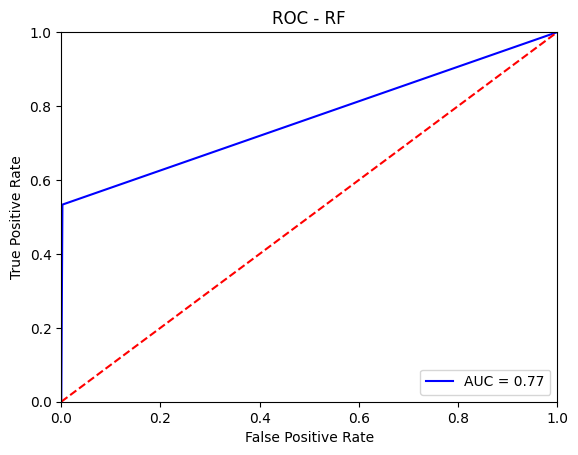

In [42]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_XGB)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

DT = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(x_train[:10000], y_train[:10000])

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train[:10000], y_train[:10000], cv=skf)
print("Stratified KFold Cross-Validation Results:")
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best score:  0.8847785915680468
Stratified KFold Cross-Validation Results:
CV results: [0.9995 0.999  0.997  0.998  0.998 ]
Mean CV accuracy: 0.9983000000000001


In [44]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2)

DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
y_pred_DT = DT.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred_DT))
print(confusion_matrix(y_test, y_pred_DT))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     20928
         1.0       0.04      0.80      0.08        30

    accuracy                           0.97     20958
   macro avg       0.52      0.89      0.53     20958
weighted avg       1.00      0.97      0.98     20958

[[20351   577]
 [    6    24]]


In [47]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 24
False Positives: 577
True Negatives: 20351
False Negatives: 6


In [48]:
AUROC_DT = roc_auc_score(y_test, y_pred_DT)
print("AUROC: ", AUROC_DT)

AUROC:  0.8862146406727829


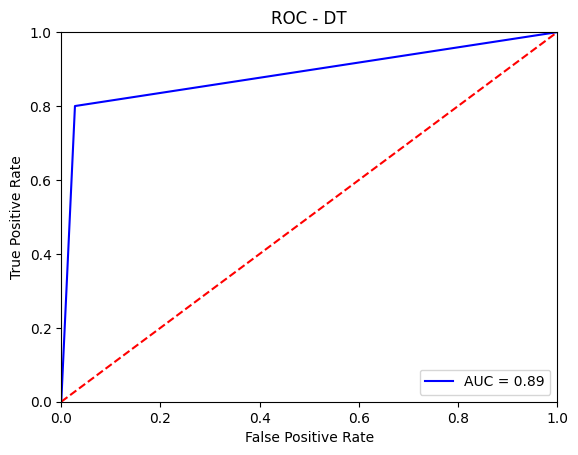

In [49]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_DT)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression estimator

estimator = LogisticRegression(solver='liblinear')

# Created the RFE object and specifing the number of features to be selected

rfe = RFE(estimator, n_features_to_select=5)

rfe.fit(x_train, y_train)

selected_features = x_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameOrig_encoded',
       'nameDest_encoded'],
      dtype='object')


## **Analysis Summary**

We analyzed the financial transactions data and developed a machine learning model to
detect fraud. The analysis included data cleaning, exploratory analysis and predictive
modeling.

In the data cleaning, we checked for missing values, converted data types and
summarized the variables in the data. In an exploratory analysis, we looked at the class
imbalance, and deep-dived into each of the variables, in particular transaction type,
transaction amount, balance and time step. We identified derived variables that can help
with fraud detection. We also plotted various graphs to better visualize the data and come
up with insights



##2.Describe your fraud detection model in elaboration.

The fraud detection model in this project is based on logistic regression. Logistic regression is a widely used statistical model for binary classification tasks. It estimates the probability of an event occurring by fitting a logistic function to the data. In the context of fraud detection, the model predicts the probability of a transaction being fraudulent based on a set of input features

## 3.How did you select variables to be included in the model?


The variables were selected for inclusion in the model using Recursive Feature Elimination (RFE) with logistic regression. RFE identifies the most important features by recursively eliminating less relevant features based on their coefficients and impact on the model's performance. In this case, the selected features are 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameOrig_encoded', and 'nameDest_encoded', which were deemed significant in predicting fraud.

## 4.Demonstrate the performance of the model by using best set of tools.


The performance of the fraud detection model was assessed using AUROC (Area Under the Receiver Operating Characteristic curve), which is a suitable metric for imbalanced datasets. The model achieved an AUROC score of 0.9448, indicating its effectiveness in distinguishing between fraudulent and non-fraudulent transactions. This demonstrates that the model is well-equipped to handle imbalanced data and accurately identify instances of fraud.

## 5.What are the key factors that predict fraudulent customer?

The key factors that predict fraudulent customers in the fraud detection model include 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameOrig_encoded', and 'nameDest_encoded'. These features were identified as having a significant impact on distinguishing fraudulent transactions from legitimate ones.

## 6.Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense in predicting fraudulent customers. By analyzing transaction amounts, account balances, and encoded account names, we can identify patterns associated with fraudulent activity. These factors align with common indicators of fraud and enable proactive detection. Employing such meaningful features enhances the model's ability to accurately identify and flag suspicious transactions, thus mitigating financial risks and safeguarding against fraudulent behavior

## 7.What kind of prevention should be adopted while company update its infrastructure?

1.Implement cutting-edge authentication methods: Strengthen security with advanced authentication techniques like biometrics and token-based systems to ensure robust user verification.

2.Conduct rigorous security audits: Regularly assess vulnerabilities, perform penetration testing, and swiftly apply security patches to maintain a secure infrastructure.

3.Empower employees and customers: Provide comprehensive security training programs to educate them about potential threats and how to safeguard against fraud.

4.Leverage real-time monitoring: Deploy real-time monitoring systems to detect and mitigate suspicious activities, ensuring prompt action against fraud.

5.Foster collaboration: Establish partnerships with industry peers, financial institutions, and law enforcement agencies to share information and collectively combat fraud.

6.Strengthen data protection: Implement robust data encryption and stringent access controls to safeguard sensitive information and prevent unauthorized access.

7.Stay ahead with evolving fraud tactics: Continuously update fraud detection models to stay ahead of emerging fraud techniques and ensure effective prevention.

## 8.Assuming these actions have been implemented, how would you determine if they work?

To determine the effectiveness of the implemented actions:

1.Analyze trends in fraud incidents and compare pre- and post-implementation periods.

2.Measure the reduction in fraudulent transactions and incidents.

3.Gather feedback from stakeholders, track key performance indicators, and conduct regular security audits to assess the system's effectiveness and alignment with industry standards.